# Problem Statement
# 1. Which locations within the King County area have the highest average house prices?

# Understanding what locations to focus the advertising campaign on is key for our stakeholders.

# 2. Which house attributes increase sale price?

# Understanding home buyers' preferences can focus our campaign and help us guide clients willing to undertake renovations prior to selling.

# 3. Does time of the year have an impact on house sales?

# Understanding seasonal trends will influence when the campaign should be launched.






In [156]:
# Obtain Data


In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd

In [158]:
#laoding dataset
kc_data=pd.read_csv("kc_house_data.csv")
kc_data.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18581,9412200330,20150410T000000,427500.0,3,1.75,1430,16200,1.0,0,0,...,7,1430,0,1967,0,98027,47.5223,-122.043,1690,13125
21061,982850120,20150303T000000,390000.0,3,2.25,1490,4539,2.0,0,0,...,7,1490,0,2009,0,98028,47.7607,-122.233,1750,4667
4753,1954430190,20140808T000000,528000.0,4,2.75,2050,7171,1.0,0,0,...,8,1540,510,1988,0,98074,47.6194,-122.042,1960,7110
9224,7436500120,20150219T000000,529000.0,3,1.75,1500,7367,1.0,0,0,...,8,1500,0,1974,0,98033,47.6722,-122.167,1920,7579
4568,5393601690,20140720T000000,370000.0,4,1.00,1310,6000,1.5,0,0,...,7,1310,0,1940,0,98144,47.5822,-122.295,1630,6000


In [159]:
len(kc_data)

21613

Our dataset has 21613 prices from house sales in the King County area.



#Train test split
Before proceeding further, we wish to split our data into a training set and a testing set. We will first need to seperate features from target and then we will make use of sklearn's train_test_split() function. We will choose to keep 10% of our data for final testing of our mode

In [160]:
#separate the dependent and target features
X=kc_data.drop("price",axis=1)
y=kc_data["price"]

In [161]:
#split
from sklearn.model_selection import train_test_split


In [162]:
#train test split of 10% Data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.10,random_state=42)

In [163]:
#len of the splited data
print(len(X_train),len(X_test),len(y_train),len(y_test))

19451 2162 19451 2162


In [164]:
#trainig data
training_df=pd.concat([X_train,y_train],axis=1)

In [165]:
training_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
6181,2787310130,20141212T000000,4,1.75,2090,7416,1.0,0,0,4,...,1050,1040,1970,0,98031,47.4107,-122.179,1710,7527,289950.0
4688,4358700100,20141202T000000,3,2.50,1450,5175,1.0,0,0,3,...,1030,420,1995,0,98133,47.7082,-122.338,1740,9250,465000.0
1703,3121069036,20141208T000000,3,1.75,3020,360241,2.0,0,0,3,...,3020,0,1992,0,98092,47.2662,-122.088,1890,209959,617000.0
21200,1959700225,20150224T000000,3,1.75,1370,1990,3.0,0,0,3,...,1370,0,2014,0,98102,47.6434,-122.324,1730,1990,720000.0
18874,3205500230,20140811T000000,3,1.75,1330,7216,1.0,0,0,3,...,1330,0,1969,0,98034,47.7199,-122.180,1500,8000,381000.0


# cleanig of dataset


In [166]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19451 entries, 6181 to 15795
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19451 non-null  int64  
 1   date           19451 non-null  object 
 2   bedrooms       19451 non-null  int64  
 3   bathrooms      19451 non-null  float64
 4   sqft_living    19451 non-null  int64  
 5   sqft_lot       19451 non-null  int64  
 6   floors         19451 non-null  float64
 7   waterfront     19451 non-null  int64  
 8   view           19451 non-null  int64  
 9   condition      19451 non-null  int64  
 10  grade          19451 non-null  int64  
 11  sqft_above     19451 non-null  int64  
 12  sqft_basement  19451 non-null  int64  
 13  yr_built       19451 non-null  int64  
 14  yr_renovated   19451 non-null  int64  
 15  zipcode        19451 non-null  int64  
 16  lat            19451 non-null  float64
 17  long           19451 non-null  float64
 18  sqf

In [167]:
#changing format of date
def change_date_form(training_df):
    training_df['date']=pd.to_datetime(training_df["date"])
    return training_df


In [168]:
#apply to change format of date
training_df=change_date_form(training_df)

In [169]:
training_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
6181,2787310130,2014-12-12,4,1.75,2090,7416,1.0,0,0,4,...,1050,1040,1970,0,98031,47.4107,-122.179,1710,7527,289950.0
4688,4358700100,2014-12-02,3,2.50,1450,5175,1.0,0,0,3,...,1030,420,1995,0,98133,47.7082,-122.338,1740,9250,465000.0
1703,3121069036,2014-12-08,3,1.75,3020,360241,2.0,0,0,3,...,3020,0,1992,0,98092,47.2662,-122.088,1890,209959,617000.0
21200,1959700225,2015-02-24,3,1.75,1370,1990,3.0,0,0,3,...,1370,0,2014,0,98102,47.6434,-122.324,1730,1990,720000.0
18874,3205500230,2014-08-11,3,1.75,1330,7216,1.0,0,0,3,...,1330,0,1969,0,98034,47.7199,-122.180,1500,8000,381000.0


In [170]:
# Investigate sqft_basement column
training_df["sqft_basement"].value_counts()

0       11851
600       203
700       198
500       186
800       184
        ...  
295         1
2610        1
588         1
2730        1
2250        1
Name: sqft_basement, Length: 301, dtype: int64

In [171]:
# Get summary statistics for sqft_basement
training_df["sqft_basement"].astype(float)

6181     1040.0
4688      420.0
1703        0.0
21200       0.0
18874       0.0
          ...  
11964       0.0
21575       0.0
5390        0.0
860         0.0
15795       0.0
Name: sqft_basement, Length: 19451, dtype: float64

# Dealing with null values


In [172]:
#checkign is there any null  value
training_df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

# checking duplicate


In [173]:
training_df.duplicated().sum()

0

There are no duplicate data in our dataset.



In [174]:
training_df["id"].duplicated().sum()

145

It indicate that house of same id may sold much more times

# Features engineering

In [175]:
# plt.figure(figsize=(20,15))
# sns.heatmap(training_df.corr(),annot=True,cbar=True,linewidths=.9)
# plt.show()

In [176]:
training_df.drop("id",axis=1,inplace=True)

In [177]:
training_df['waterfront'].corr(training_df['condition'])

0.016123779968162087

In [178]:
training_df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
6181,2014-12-12,4,1.75,2090,7416,1.0,0,0,4,7,1050,1040,1970,0,98031,47.4107,-122.179,1710,7527,289950.0
4688,2014-12-02,3,2.50,1450,5175,1.0,0,0,3,8,1030,420,1995,0,98133,47.7082,-122.338,1740,9250,465000.0
1703,2014-12-08,3,1.75,3020,360241,2.0,0,0,3,8,3020,0,1992,0,98092,47.2662,-122.088,1890,209959,617000.0
21200,2015-02-24,3,1.75,1370,1990,3.0,0,0,3,9,1370,0,2014,0,98102,47.6434,-122.324,1730,1990,720000.0
18874,2014-08-11,3,1.75,1330,7216,1.0,0,0,3,7,1330,0,1969,0,98034,47.7199,-122.180,1500,8000,381000.0


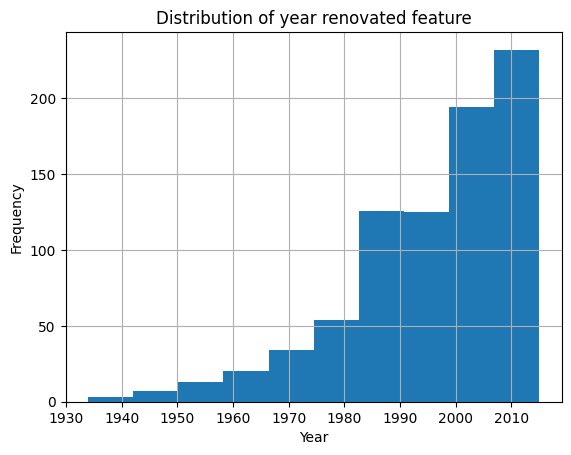

<module 'matplotlib.pyplot' from 'C:\\Users\\Acer\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [179]:
# Visualise yr_renovated post 1900 (to not show all the 0 values)
training_df[training_df['yr_renovated'] > 1900]['yr_renovated'].hist()
plt.xlabel("Year")
plt.ylabel('Frequency')
plt.title("Distribution of year renovated feature")
plt.show()

plt

In [180]:
training_df.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

# Numerical FEACTURES

In [181]:
training_df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
6181,2014-12-12,4,1.75,2090,7416,1.0,0,0,4,7,1050,1040,1970,0,98031,47.4107,-122.179,1710,7527,289950.0
4688,2014-12-02,3,2.50,1450,5175,1.0,0,0,3,8,1030,420,1995,0,98133,47.7082,-122.338,1740,9250,465000.0
1703,2014-12-08,3,1.75,3020,360241,2.0,0,0,3,8,3020,0,1992,0,98092,47.2662,-122.088,1890,209959,617000.0
21200,2015-02-24,3,1.75,1370,1990,3.0,0,0,3,9,1370,0,2014,0,98102,47.6434,-122.324,1730,1990,720000.0
18874,2014-08-11,3,1.75,1330,7216,1.0,0,0,3,7,1330,0,1969,0,98034,47.7199,-122.180,1500,8000,381000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2014-11-13,3,1.50,1000,6914,1.0,0,0,3,7,1000,0,1947,0,98125,47.7144,-122.319,1000,6947,378000.0
21575,2014-11-11,3,2.50,3087,5002,2.0,0,0,3,8,3087,0,2014,0,98023,47.2974,-122.349,2927,5183,399950.0
5390,2014-09-30,3,2.50,2120,4780,2.0,0,0,3,7,2120,0,2004,0,98053,47.6810,-122.032,1690,2650,575000.0
860,2014-06-20,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000,245000.0


In [182]:
# Define function to create was_renovated_post90 feature
def renovation_feature(df):
    '''Creates bool was_renovated_post90 feature and drops original yr_renovated feature'''
    df['was_renovated_post90'] = df['yr_renovated'].map(lambda x: 1 if x > 1990 else 0)
    return df

In [183]:
renovation_feature(training_df)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,was_renovated_post90
6181,2014-12-12,4,1.75,2090,7416,1.0,0,0,4,7,...,1040,1970,0,98031,47.4107,-122.179,1710,7527,289950.0,0
4688,2014-12-02,3,2.50,1450,5175,1.0,0,0,3,8,...,420,1995,0,98133,47.7082,-122.338,1740,9250,465000.0,0
1703,2014-12-08,3,1.75,3020,360241,2.0,0,0,3,8,...,0,1992,0,98092,47.2662,-122.088,1890,209959,617000.0,0
21200,2015-02-24,3,1.75,1370,1990,3.0,0,0,3,9,...,0,2014,0,98102,47.6434,-122.324,1730,1990,720000.0,0
18874,2014-08-11,3,1.75,1330,7216,1.0,0,0,3,7,...,0,1969,0,98034,47.7199,-122.180,1500,8000,381000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2014-11-13,3,1.50,1000,6914,1.0,0,0,3,7,...,0,1947,0,98125,47.7144,-122.319,1000,6947,378000.0,0
21575,2014-11-11,3,2.50,3087,5002,2.0,0,0,3,8,...,0,2014,0,98023,47.2974,-122.349,2927,5183,399950.0,0
5390,2014-09-30,3,2.50,2120,4780,2.0,0,0,3,7,...,0,2004,0,98053,47.6810,-122.032,1690,2650,575000.0,0
860,2014-06-20,1,0.75,380,15000,1.0,0,0,3,5,...,0,1963,0,98168,47.4810,-122.323,1170,15000,245000.0,0


In [184]:
# Get summary statistics for yr_built
training_df['yr_built'].describe()

count    19451.000000
mean      1971.063441
std         29.399033
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

<Axes: ylabel='yr_built'>

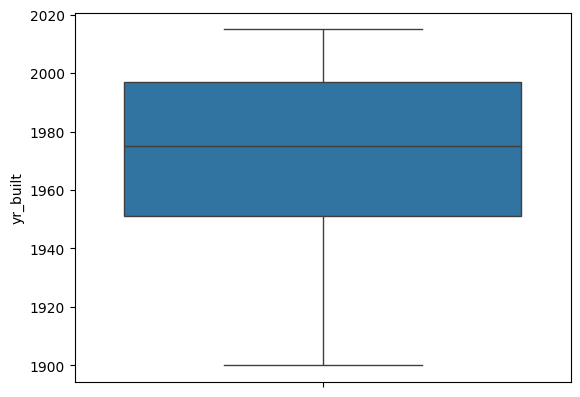

In [185]:
sns.boxplot(training_df['yr_built'])

It has no outlier

<Axes: >

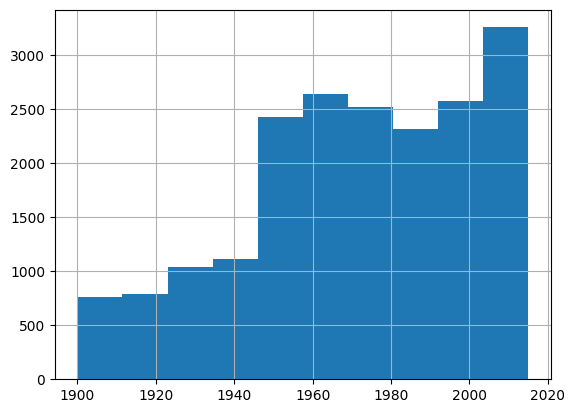

In [186]:
training_df["yr_built"].hist()

We are going to define bins as the yr_built feature should be treated as a categorical variable. We will use the summary statistics (quartiles) to define our bins, so that we have roughly the same number of data points in each bin.

In [187]:
#continuous into categorical
0# Define function to map yr_built into bins
def year_built(df):
    ''' Maps yr_built feature into categorical bins'''
    
    # Define bins based on statistics
    yr_built_bins = [1899, 1950, 1975, 1997, 2016]
    yr_built_labels = ['pre1950', '1950_to_1975', '1975_to_1997', '1997_to_2015']
    
    # Map to bins using pd.cut()
    df['yr_built'] = pd.cut(df['yr_built'], bins = yr_built_bins, labels = yr_built_labels)
    
    return df


In [188]:
#appy for the function
year_built(training_df)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,was_renovated_post90
6181,2014-12-12,4,1.75,2090,7416,1.0,0,0,4,7,...,1040,1950_to_1975,0,98031,47.4107,-122.179,1710,7527,289950.0,0
4688,2014-12-02,3,2.50,1450,5175,1.0,0,0,3,8,...,420,1975_to_1997,0,98133,47.7082,-122.338,1740,9250,465000.0,0
1703,2014-12-08,3,1.75,3020,360241,2.0,0,0,3,8,...,0,1975_to_1997,0,98092,47.2662,-122.088,1890,209959,617000.0,0
21200,2015-02-24,3,1.75,1370,1990,3.0,0,0,3,9,...,0,1997_to_2015,0,98102,47.6434,-122.324,1730,1990,720000.0,0
18874,2014-08-11,3,1.75,1330,7216,1.0,0,0,3,7,...,0,1950_to_1975,0,98034,47.7199,-122.180,1500,8000,381000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2014-11-13,3,1.50,1000,6914,1.0,0,0,3,7,...,0,pre1950,0,98125,47.7144,-122.319,1000,6947,378000.0,0
21575,2014-11-11,3,2.50,3087,5002,2.0,0,0,3,8,...,0,1997_to_2015,0,98023,47.2974,-122.349,2927,5183,399950.0,0
5390,2014-09-30,3,2.50,2120,4780,2.0,0,0,3,7,...,0,1997_to_2015,0,98053,47.6810,-122.032,1690,2650,575000.0,0
860,2014-06-20,1,0.75,380,15000,1.0,0,0,3,5,...,0,1950_to_1975,0,98168,47.4810,-122.323,1170,15000,245000.0,0


<Axes: >

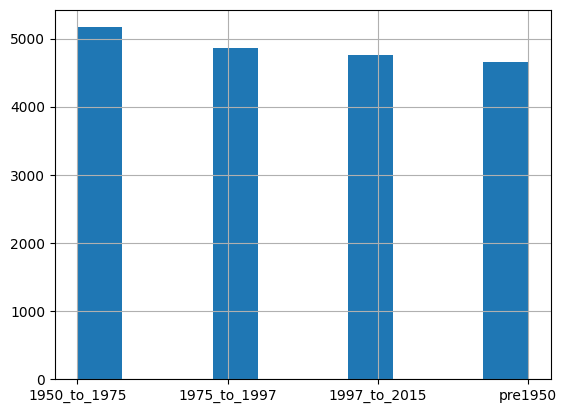

In [189]:
training_df["yr_built"].hist()

In [190]:
# Define function has_basement
def has_basement(df):
    '''creates bool feature has_basement and drops original basement feature'''
    df['has_basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
    df = df.drop('sqft_basement', axis = 1)
    return df

In [191]:
#appy the function
has_basement(training_df)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,was_renovated_post90,has_basement
6181,2014-12-12,4,1.75,2090,7416,1.0,0,0,4,7,...,1950_to_1975,0,98031,47.4107,-122.179,1710,7527,289950.0,0,1
4688,2014-12-02,3,2.50,1450,5175,1.0,0,0,3,8,...,1975_to_1997,0,98133,47.7082,-122.338,1740,9250,465000.0,0,1
1703,2014-12-08,3,1.75,3020,360241,2.0,0,0,3,8,...,1975_to_1997,0,98092,47.2662,-122.088,1890,209959,617000.0,0,0
21200,2015-02-24,3,1.75,1370,1990,3.0,0,0,3,9,...,1997_to_2015,0,98102,47.6434,-122.324,1730,1990,720000.0,0,0
18874,2014-08-11,3,1.75,1330,7216,1.0,0,0,3,7,...,1950_to_1975,0,98034,47.7199,-122.180,1500,8000,381000.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2014-11-13,3,1.50,1000,6914,1.0,0,0,3,7,...,pre1950,0,98125,47.7144,-122.319,1000,6947,378000.0,0,0
21575,2014-11-11,3,2.50,3087,5002,2.0,0,0,3,8,...,1997_to_2015,0,98023,47.2974,-122.349,2927,5183,399950.0,0,0
5390,2014-09-30,3,2.50,2120,4780,2.0,0,0,3,7,...,1997_to_2015,0,98053,47.6810,-122.032,1690,2650,575000.0,0,0
860,2014-06-20,1,0.75,380,15000,1.0,0,0,3,5,...,1950_to_1975,0,98168,47.4810,-122.323,1170,15000,245000.0,0,0


In [192]:
# Define function has viw
def has_viewed(df):
    '''creates bool feature has_basement and drops original basement feature'''
    df['viewed'] = df['view'].map(lambda x: 1 if x > 0 else 0)
    df = df.drop('sqft_basement', axis = 1)
    return df

In [193]:
#appy function
has_viewed(training_df)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,was_renovated_post90,has_basement,viewed
6181,2014-12-12,4,1.75,2090,7416,1.0,0,0,4,7,...,0,98031,47.4107,-122.179,1710,7527,289950.0,0,1,0
4688,2014-12-02,3,2.50,1450,5175,1.0,0,0,3,8,...,0,98133,47.7082,-122.338,1740,9250,465000.0,0,1,0
1703,2014-12-08,3,1.75,3020,360241,2.0,0,0,3,8,...,0,98092,47.2662,-122.088,1890,209959,617000.0,0,0,0
21200,2015-02-24,3,1.75,1370,1990,3.0,0,0,3,9,...,0,98102,47.6434,-122.324,1730,1990,720000.0,0,0,0
18874,2014-08-11,3,1.75,1330,7216,1.0,0,0,3,7,...,0,98034,47.7199,-122.180,1500,8000,381000.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2014-11-13,3,1.50,1000,6914,1.0,0,0,3,7,...,0,98125,47.7144,-122.319,1000,6947,378000.0,0,0,0
21575,2014-11-11,3,2.50,3087,5002,2.0,0,0,3,8,...,0,98023,47.2974,-122.349,2927,5183,399950.0,0,0,0
5390,2014-09-30,3,2.50,2120,4780,2.0,0,0,3,7,...,0,98053,47.6810,-122.032,1690,2650,575000.0,0,0,0
860,2014-06-20,1,0.75,380,15000,1.0,0,0,3,5,...,0,98168,47.4810,-122.323,1170,15000,245000.0,0,0,0


In [194]:
#bathroom featurex
training_df['bathrooms']

6181     1.75
4688     2.50
1703     1.75
21200    1.75
18874    1.75
         ... 
11964    1.50
21575    2.50
5390     2.50
860      0.75
15795    2.50
Name: bathrooms, Length: 19451, dtype: float64

In [195]:
#rounding the bathroom featurewa

training_df["bathrooms"]=training_df["bathrooms"].map(lambda x:int(round(x,1)))

In [196]:
training_df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,was_renovated_post90,has_basement,viewed
6181,2014-12-12,4,1,2090,7416,1.0,0,0,4,7,...,0,98031,47.4107,-122.179,1710,7527,289950.0,0,1,0
4688,2014-12-02,3,2,1450,5175,1.0,0,0,3,8,...,0,98133,47.7082,-122.338,1740,9250,465000.0,0,1,0
1703,2014-12-08,3,1,3020,360241,2.0,0,0,3,8,...,0,98092,47.2662,-122.088,1890,209959,617000.0,0,0,0
21200,2015-02-24,3,1,1370,1990,3.0,0,0,3,9,...,0,98102,47.6434,-122.324,1730,1990,720000.0,0,0,0
18874,2014-08-11,3,1,1330,7216,1.0,0,0,3,7,...,0,98034,47.7199,-122.180,1500,8000,381000.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2014-11-13,3,1,1000,6914,1.0,0,0,3,7,...,0,98125,47.7144,-122.319,1000,6947,378000.0,0,0,0
21575,2014-11-11,3,2,3087,5002,2.0,0,0,3,8,...,0,98023,47.2974,-122.349,2927,5183,399950.0,0,0,0
5390,2014-09-30,3,2,2120,4780,2.0,0,0,3,7,...,0,98053,47.6810,-122.032,1690,2650,575000.0,0,0,0
860,2014-06-20,1,0,380,15000,1.0,0,0,3,5,...,0,98168,47.4810,-122.323,1170,15000,245000.0,0,0,0


<Axes: ylabel='bathrooms'>

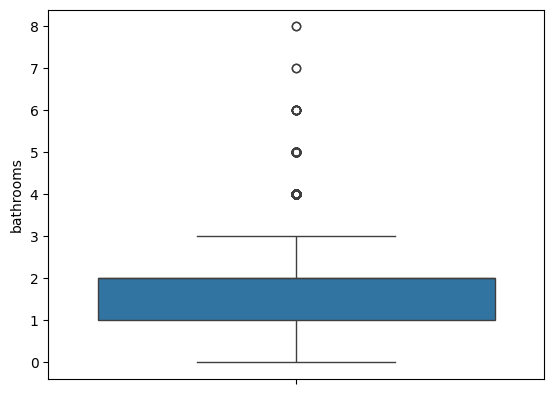

In [197]:
sns.boxplot(training_df["bathrooms"])


<Axes: ylabel='bedrooms'>

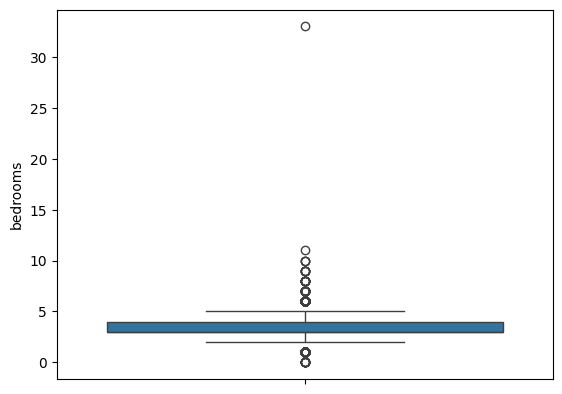

In [198]:
sns.boxplot(training_df["bedrooms"])

In [199]:
#detecting the outlier
def for_box_plot(df):
    for feature in df.columns:
        sns.boxplot(df[feature])
    

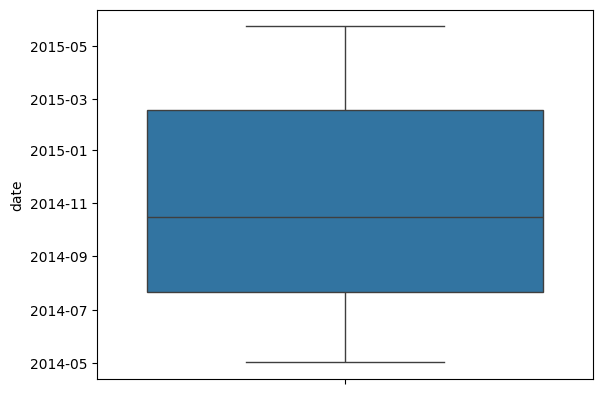

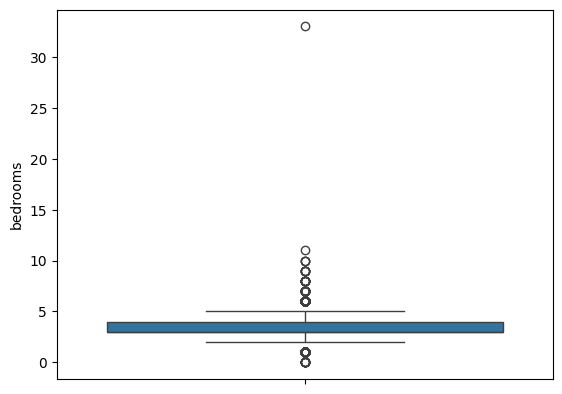

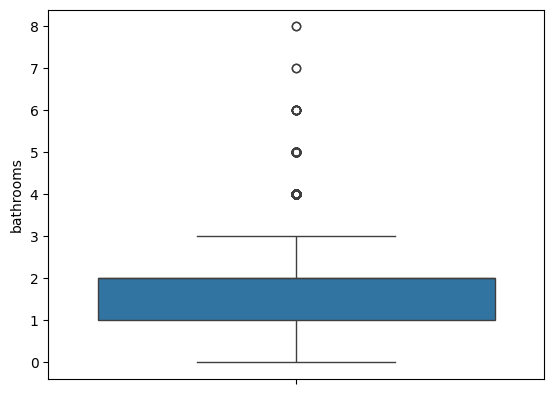

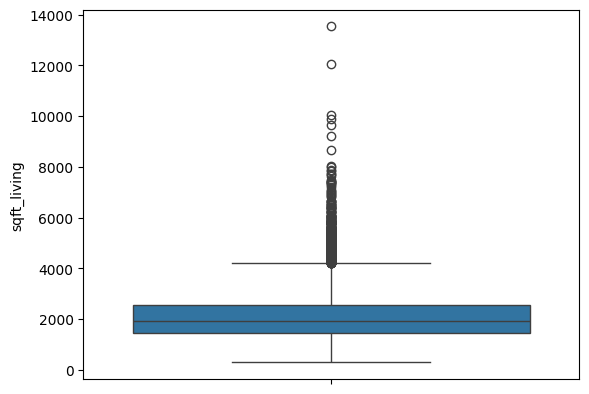

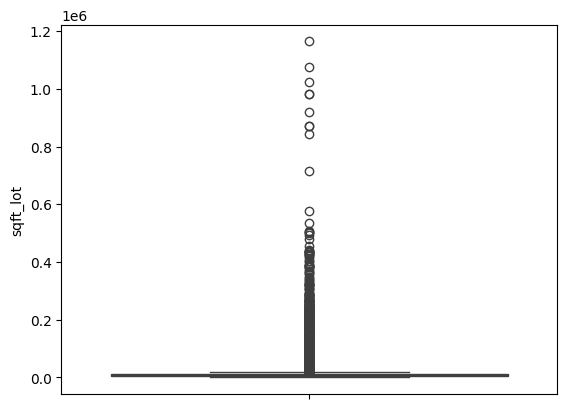

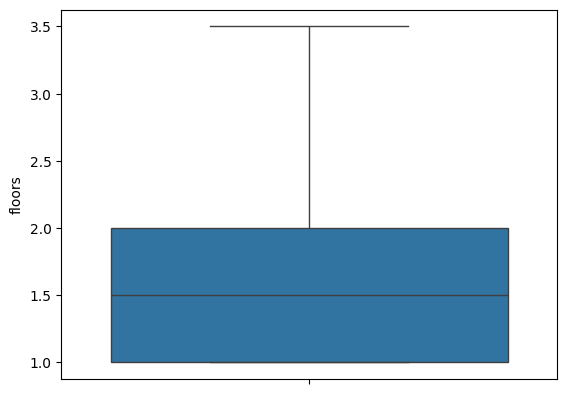

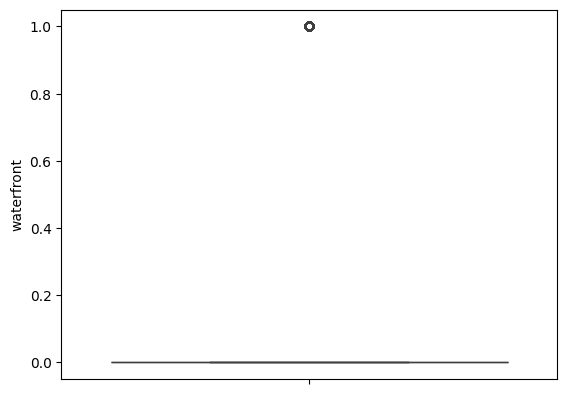

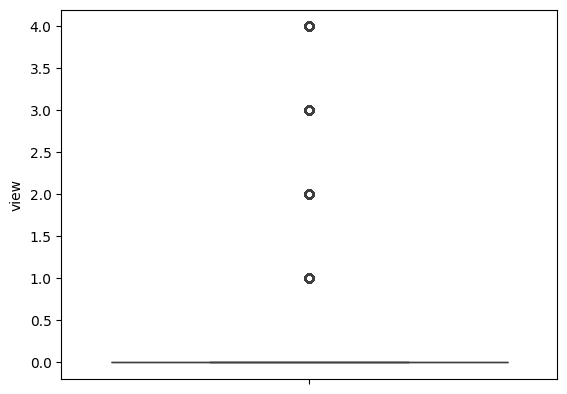

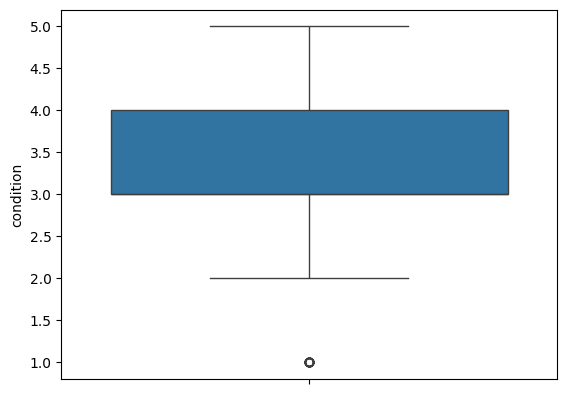

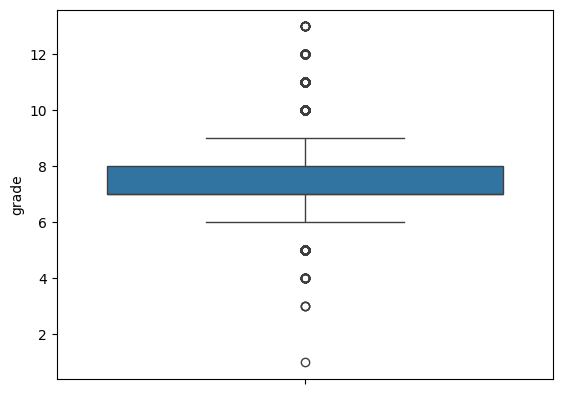

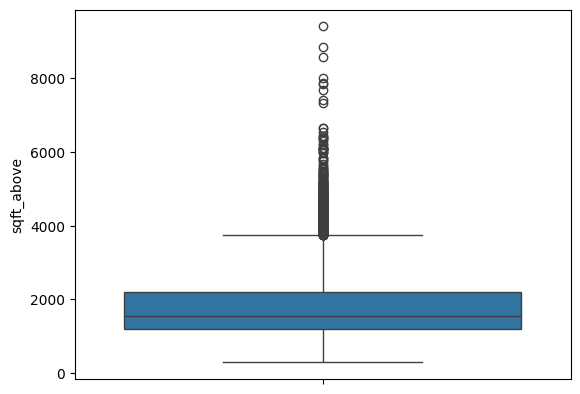

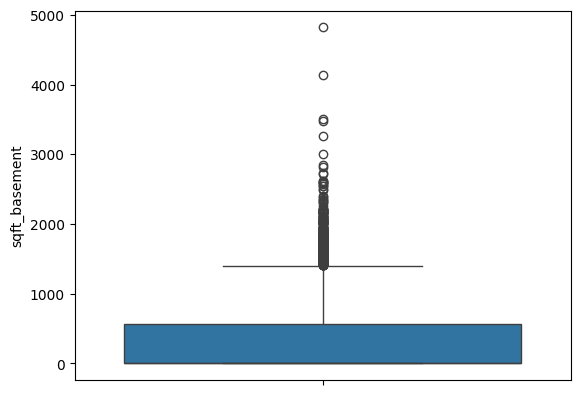

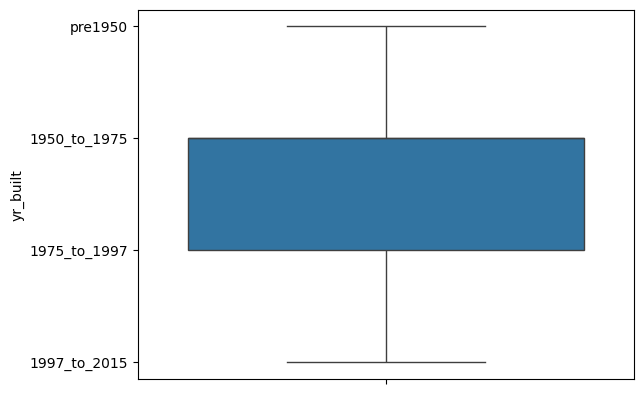

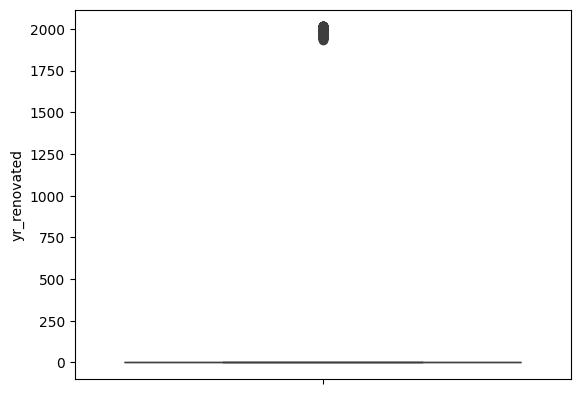

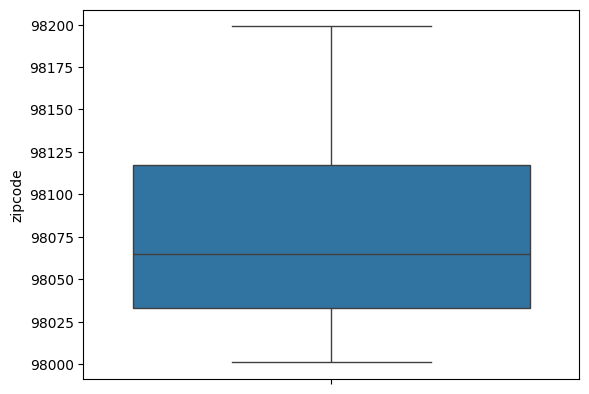

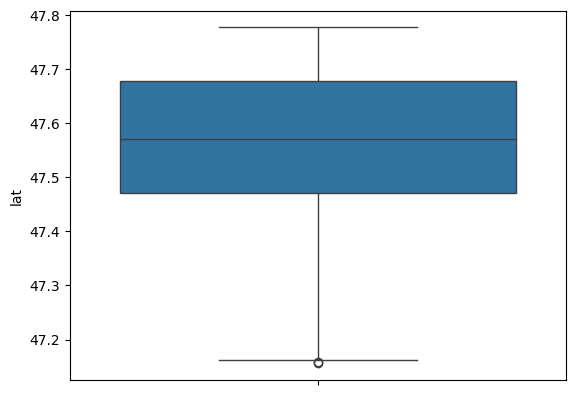

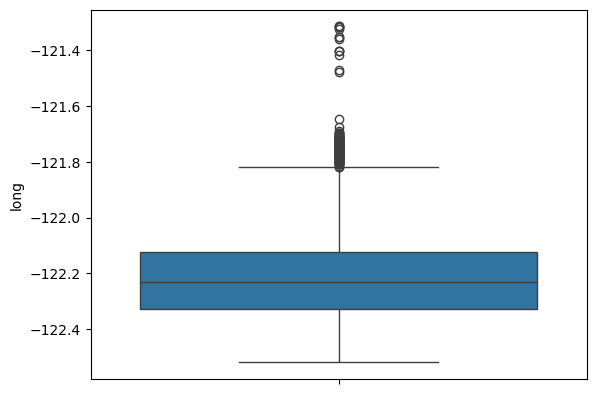

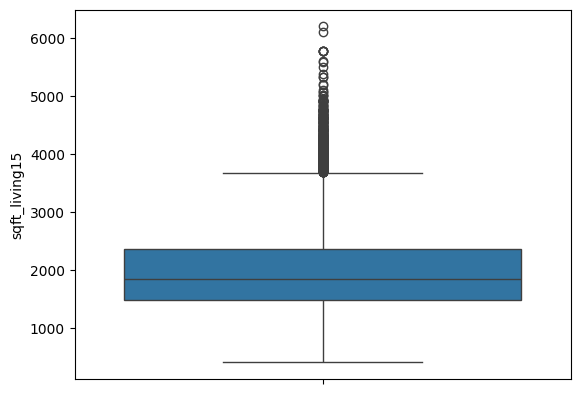

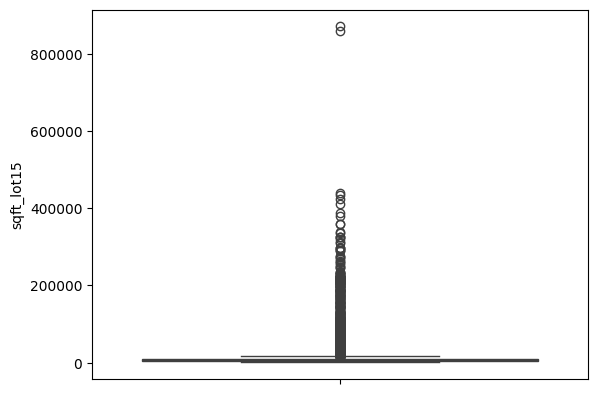

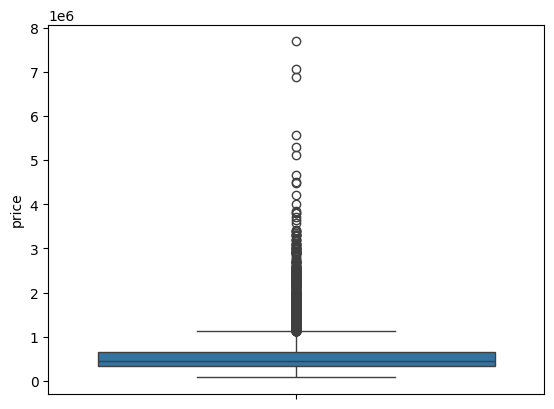

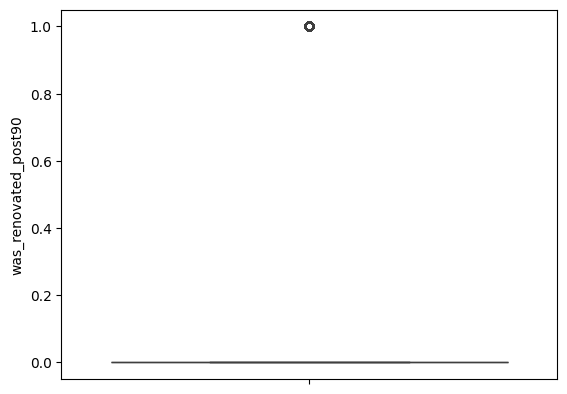

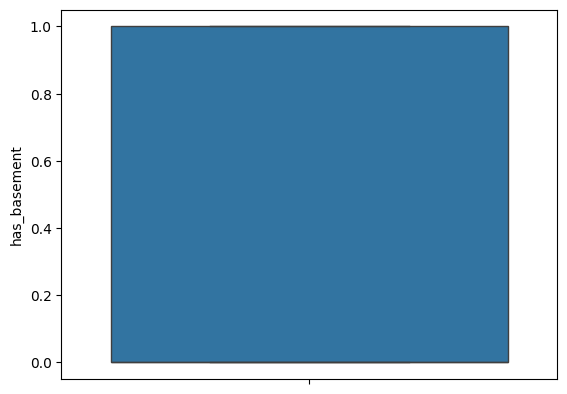

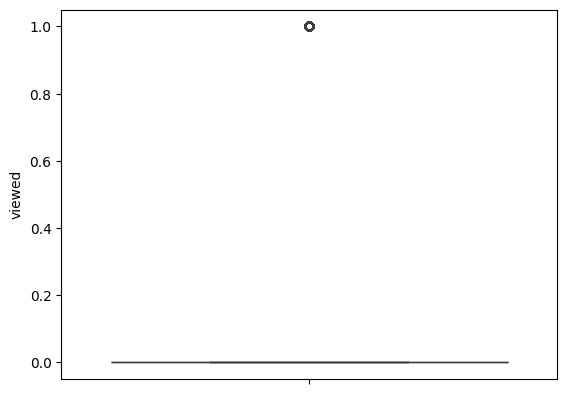

In [200]:
for feature in training_df.columns:
        data=training_df.copy()
        sns.boxplot( data[feature])
        plt.show()

In [201]:
training_df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,was_renovated_post90,has_basement,viewed
6181,2014-12-12,4,1,2090,7416,1.0,0,0,4,7,...,0,98031,47.4107,-122.179,1710,7527,289950.0,0,1,0
4688,2014-12-02,3,2,1450,5175,1.0,0,0,3,8,...,0,98133,47.7082,-122.338,1740,9250,465000.0,0,1,0
1703,2014-12-08,3,1,3020,360241,2.0,0,0,3,8,...,0,98092,47.2662,-122.088,1890,209959,617000.0,0,0,0
21200,2015-02-24,3,1,1370,1990,3.0,0,0,3,9,...,0,98102,47.6434,-122.324,1730,1990,720000.0,0,0,0
18874,2014-08-11,3,1,1330,7216,1.0,0,0,3,7,...,0,98034,47.7199,-122.180,1500,8000,381000.0,0,0,0


In [202]:
training_df['bedrooms'].value_counts().sort_values()

11       1
33       1
10       3
9        6
0       11
8       12
7       34
1      175
6      239
5     1441
2     2491
4     6193
3     8844
Name: bedrooms, dtype: int64

In [203]:
# training_df[training_df['bedrooms']==33]
training_df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,was_renovated_post90,has_basement,viewed
count,19451.000000,19451.000000,19451.000000,1.945100e+04,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,...,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,1.945100e+04,19451.000000,19451.000000,19451.000000
mean,3.370624,1.748136,2078.771528,1.492323e+04,1.496890,0.007455,0.233818,3.409748,7.655956,1789.363066,...,82.916817,98077.916251,47.560092,-122.214139,1985.410879,12727.821809,5.390161e+05,0.028328,0.390725,0.098298
std,0.932067,0.735341,919.504897,3.941470e+04,0.541305,0.086020,0.764999,0.651923,1.174705,830.288601,...,398.308283,53.443919,0.138510,0.140525,685.478793,27121.094657,3.654581e+05,0.165911,0.487926,0.297725
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,...,0.000000,98033.000000,47.471300,-122.329000,1480.000000,5100.000000,3.217250e+05,0.000000,0.000000,0.000000
50%,3.000000,2.000000,1910.000000,7.616000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,...,0.000000,98065.000000,47.571600,-122.231000,1840.000000,7620.000000,4.500000e+05,0.000000,0.000000,0.000000
75%,4.000000,2.000000,2545.500000,1.066750e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,...,0.000000,98117.000000,47.678000,-122.125000,2360.000000,10080.000000,6.400000e+05,0.000000,1.000000,0.000000
max,33.000000,8.000000,13540.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06,1.000000,1.000000,1.000000


In [204]:

# q1,q3


In [205]:
# df=training_df.copy()
# for feature in training_df.columns:
# #     feature='zipcode'
#     q1 = df[feature].quantile(0.25)
#     q3 = df[feature].quantile(0.75)
#     iqr = q3 - q1
#     lower_limit = q1 - 1.5 * iqr
#     upper_limit = q3 + 1.5 * iqr

#     # Remove outliers for the current feature
#     df = df[(df[feature] >= lower_limit) & (df[feature] <= upper_limit)]
#     print(feature)
    





In [206]:
# Define function to remove outliers
def remove_outliers(df):
    '''removes entries with z-score above 3 for specific columns'''
    variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 
                 'lat', 'long', 'sqft_living15', 'sqft_lot15','price']
    
    for variable in variables:
       
        q1 = df[variable].quantile(0.25)
        q3 = df[variable].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr
        
        lower_limit=max(lower_limit,df[variable].min())
        upper_limit=min(upper_limit,df[variable].max())

#     # Remove outliers for the current feature
        df = df[(df[variable] >= lower_limit) & (df[variable] <= upper_limit)]

        
    return df


In [207]:
training_df=remove_outliers(training_df)

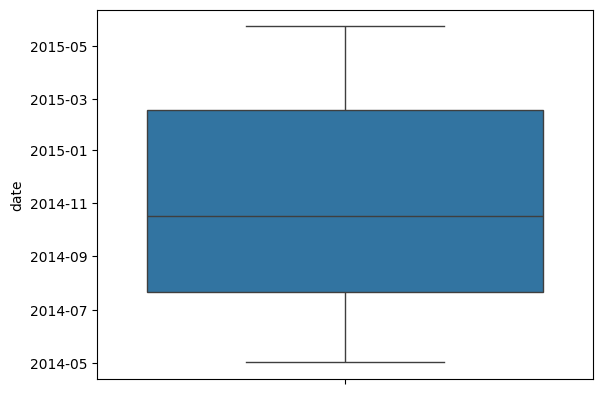

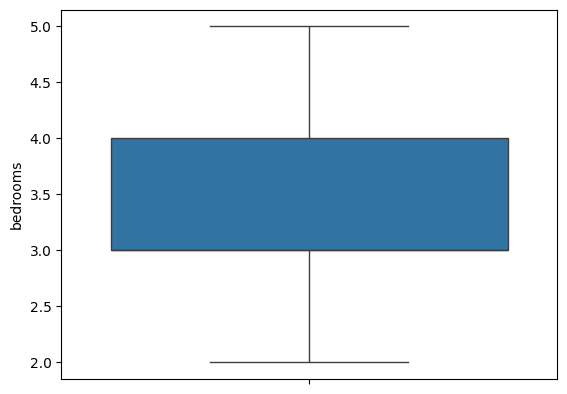

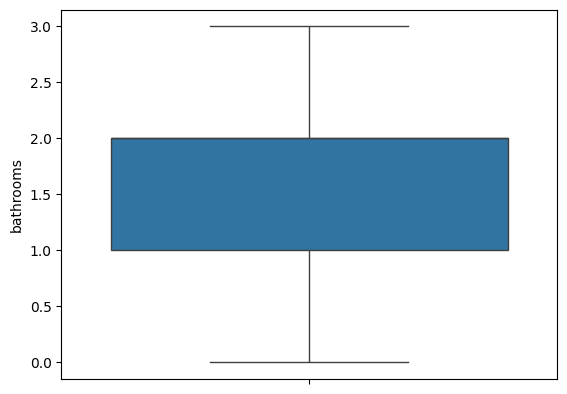

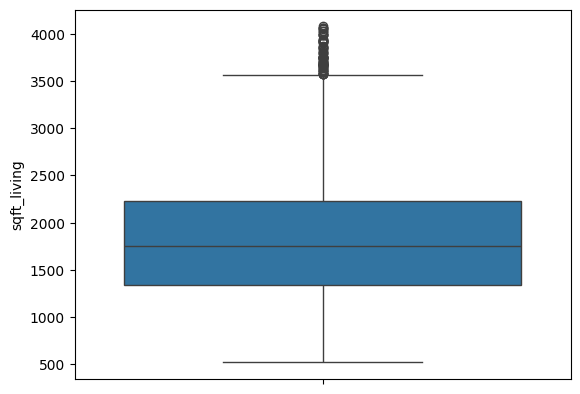

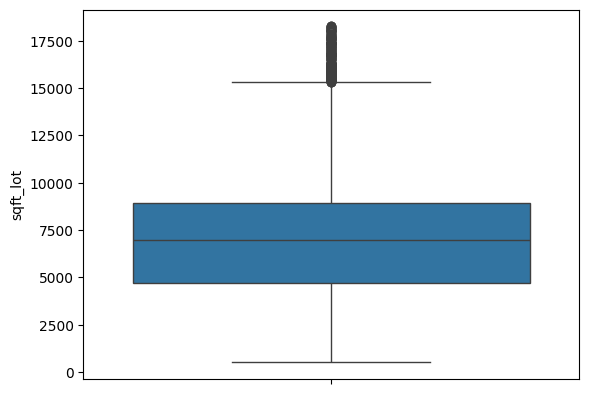

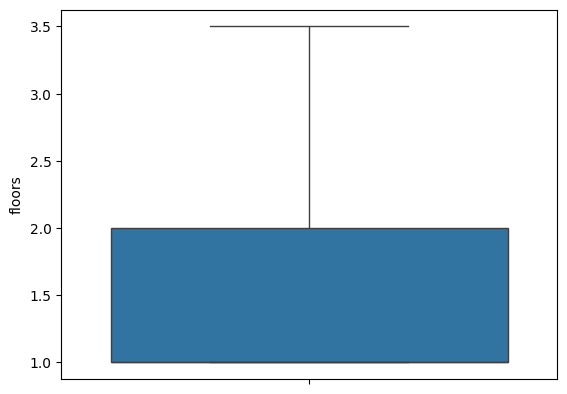

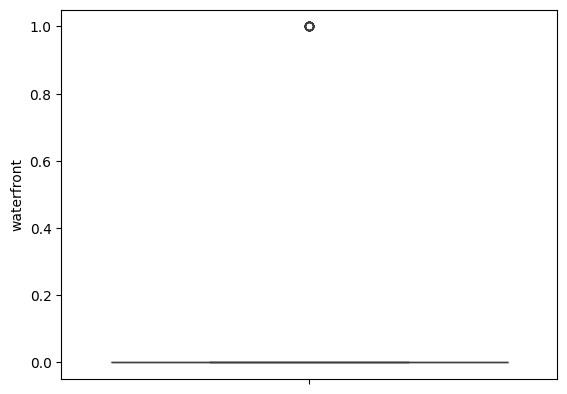

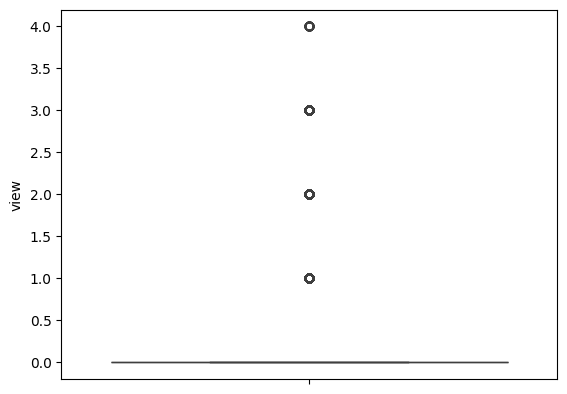

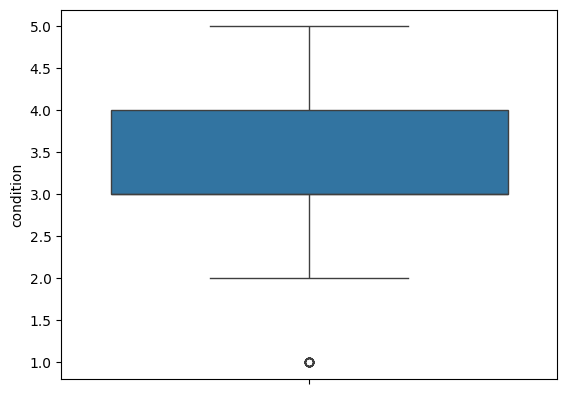

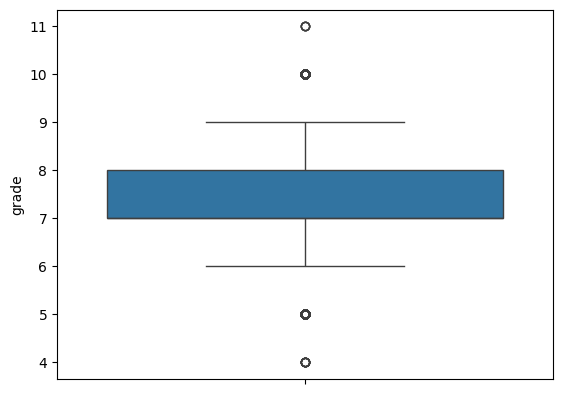

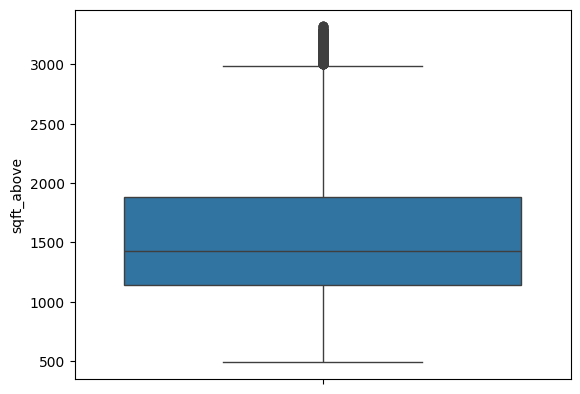

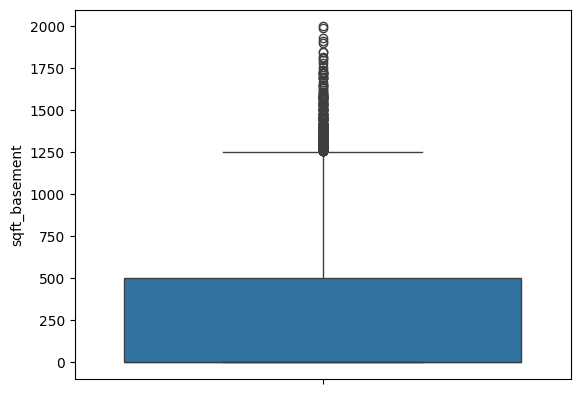

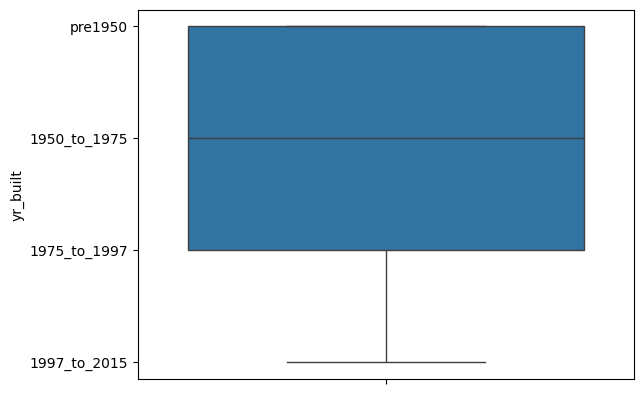

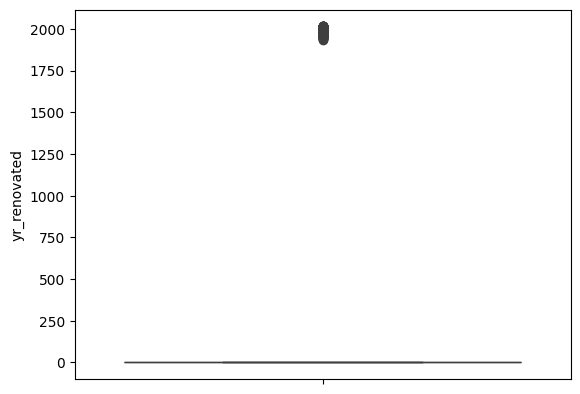

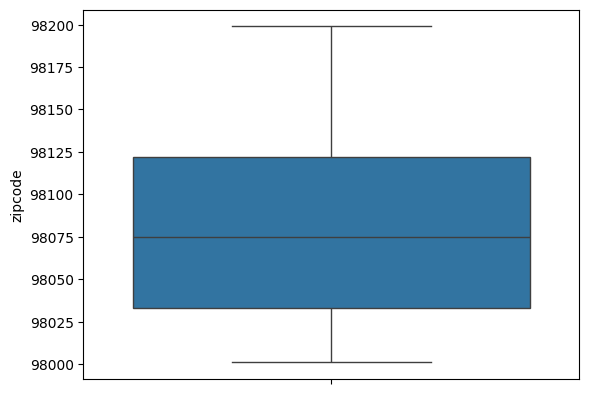

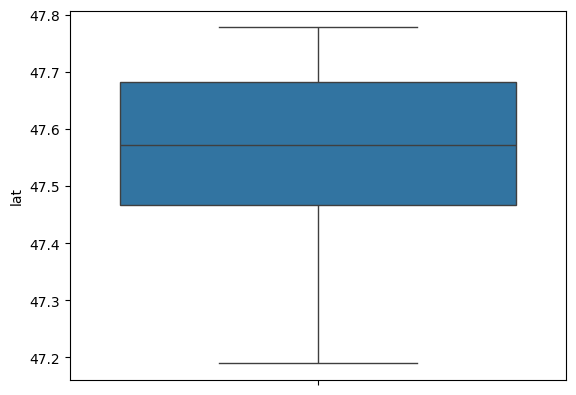

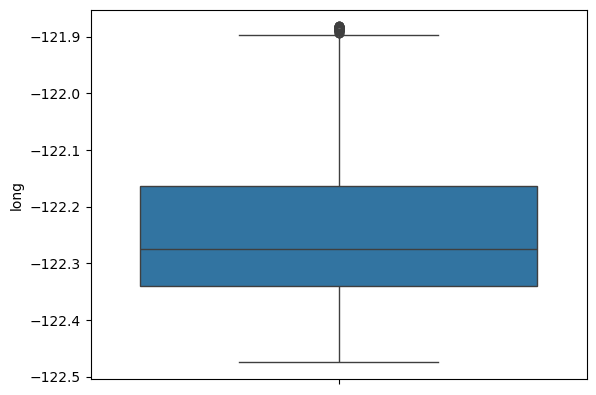

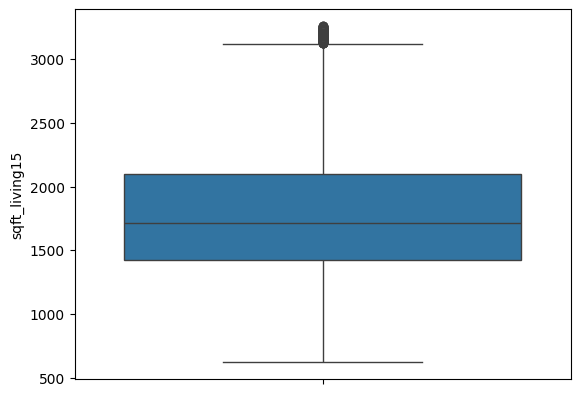

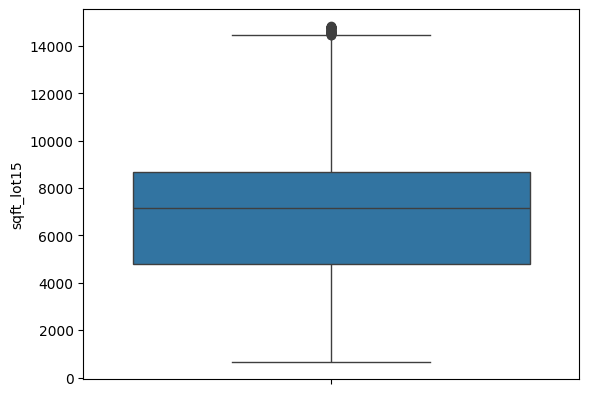

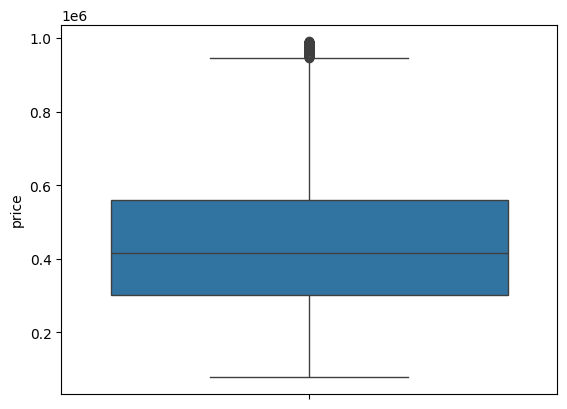

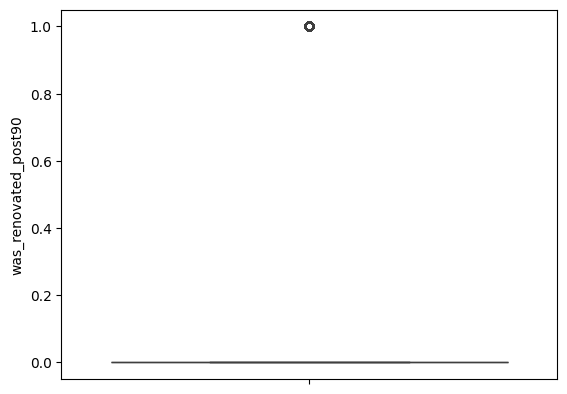

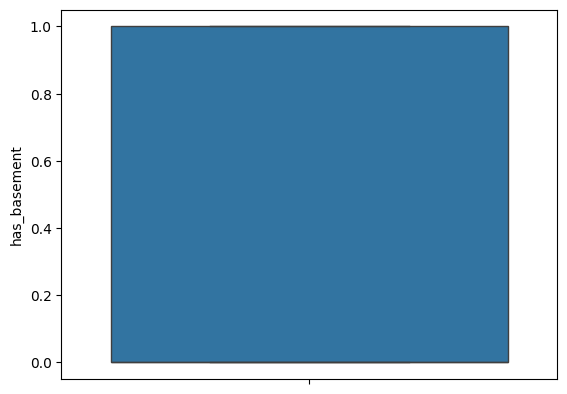

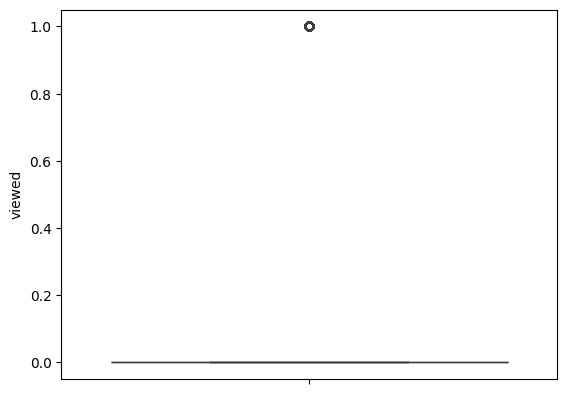

In [208]:
for feature in training_df.columns:
        data=training_df.copy()
        sns.boxplot( data[feature])
        plt.show()

In [209]:
#investgate the price columns
training_df['price'].describe().round(3)

count     14614.000
mean     446184.066
std      183257.768
min       78000.000
25%      302000.000
50%      415000.000
75%      560000.000
max      991700.000
Name: price, dtype: float64

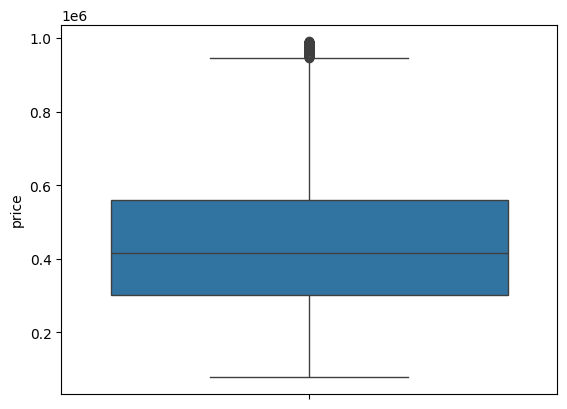

In [210]:
#price distributon
#  View price distribution
sns.boxplot(training_df['price'])

plt.show()

In [211]:
training_df.shape
#outlier ahs been removed

(14614, 23)

# Q1: Location


Location is key when it comes to real estate. Our first question seeks to understand the geographical distribution of the homes in our dataset and determine where the highest house sales were recorded.

As a starting point, let us create a scatterplot using latitude and longitude features

# bivariate analysis

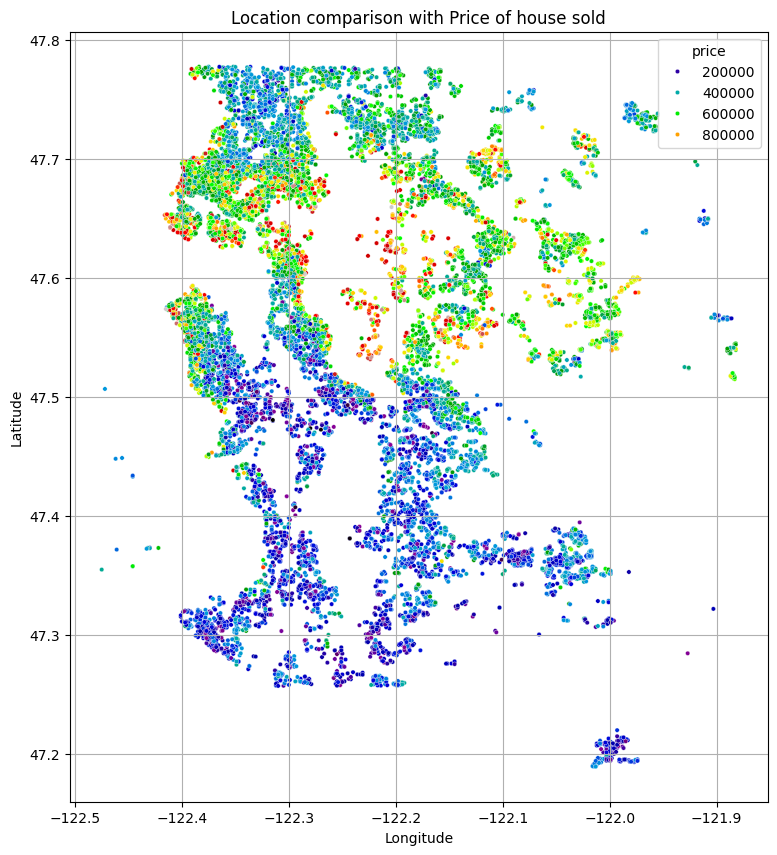

In [212]:
    plt.figure(figsize=(9,10))
    sns.scatterplot(x=training_df["long"],y=training_df["lat"],hue=training_df["price"],  palette = 'nipy_spectral',s=10)
    plt.ylabel("Latitude")
    plt.xlabel("Longitude")  
    plt.title("Location comparison with Price of house sold")
    plt.grid()
    
    plt.show()

observation:This give the information about the huse sold in specific area

Map of house sales


In [213]:
# training_df_location=training_df.copy()
# Define coord as tuple (lat,long)
training_df['coord'] = list(zip(training_df['lat'], training_df['long']))

In [214]:
training_df_location

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,was_renovated_post90,has_basement,viewed,coord
6181,2014-12-12,4,1,2090,7416,1.0,0,0,4,7,...,98031,47.4107,-122.179,1710,7527,289950.0,0,1,0,"(47.4107, -122.179)"
4688,2014-12-02,3,2,1450,5175,1.0,0,0,3,8,...,98133,47.7082,-122.338,1740,9250,465000.0,0,1,0,"(47.7082, -122.338)"
21200,2015-02-24,3,1,1370,1990,3.0,0,0,3,9,...,98102,47.6434,-122.324,1730,1990,720000.0,0,0,0,"(47.6434, -122.324)"
18874,2014-08-11,3,1,1330,7216,1.0,0,0,3,7,...,98034,47.7199,-122.180,1500,8000,381000.0,0,0,0,"(47.7199, -122.18)"
19388,2014-05-13,3,1,1270,5112,1.0,0,0,3,7,...,98115,47.6760,-122.288,1580,5080,465000.0,0,0,0,"(47.676, -122.288)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2014-05-31,5,2,2080,13189,2.0,0,0,3,8,...,98074,47.6288,-122.031,2030,11847,538888.0,0,0,0,"(47.6288, -122.031)"
11964,2014-11-13,3,1,1000,6914,1.0,0,0,3,7,...,98125,47.7144,-122.319,1000,6947,378000.0,0,0,0,"(47.7144, -122.319)"
21575,2014-11-11,3,2,3087,5002,2.0,0,0,3,8,...,98023,47.2974,-122.349,2927,5183,399950.0,0,0,0,"(47.2974, -122.349)"
5390,2014-09-30,3,2,2120,4780,2.0,0,0,3,7,...,98053,47.6810,-122.032,1690,2650,575000.0,0,0,0,"(47.681, -122.032)"


# House prices per Zipcode


In [215]:
# Explore zipcode
training_df['zipcode'].value_counts()


98103    512
98115    471
98117    462
98133    428
98118    425
        ... 
98077     24
98024     19
98014     15
98070     14
98039      5
Name: zipcode, Length: 69, dtype: int64

In [216]:
# # Load geojson file
# geodatafilename = 'Zipcodes_for_King_County_and_Surrounding_Area_Shorelines__zipcode_shore_area.geojson'
# gdf = gpd.read_file(geodatafilename)
# gdf[:3]

In [217]:
training_df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,was_renovated_post90,has_basement,viewed,coord
6181,2014-12-12,4,1,2090,7416,1.0,0,0,4,7,...,98031,47.4107,-122.179,1710,7527,289950.0,0,1,0,"(47.4107, -122.179)"
4688,2014-12-02,3,2,1450,5175,1.0,0,0,3,8,...,98133,47.7082,-122.338,1740,9250,465000.0,0,1,0,"(47.7082, -122.338)"
21200,2015-02-24,3,1,1370,1990,3.0,0,0,3,9,...,98102,47.6434,-122.324,1730,1990,720000.0,0,0,0,"(47.6434, -122.324)"
18874,2014-08-11,3,1,1330,7216,1.0,0,0,3,7,...,98034,47.7199,-122.180,1500,8000,381000.0,0,0,0,"(47.7199, -122.18)"
19388,2014-05-13,3,1,1270,5112,1.0,0,0,3,7,...,98115,47.6760,-122.288,1580,5080,465000.0,0,0,0,"(47.676, -122.288)"


In [218]:
training_df["zipcode"]

6181     98031
4688     98133
21200    98102
18874    98034
19388    98115
         ...  
6265     98074
11964    98125
21575    98023
5390     98053
15795    98042
Name: zipcode, Length: 14614, dtype: int64

In [219]:
group=training_df.groupby(['zipcode','price'])
group.first()

date  bedrooms  bathrooms  sqft_living  sqft_lot  \
zipcode price                                                             
98001   115000.0 2014-12-05         2          1         1000     16524   
        124500.0 2015-03-26         2          1          840      6480   
        132500.0 2014-05-23         3          1         1080     10500   
        150000.0 2014-06-26         3          1         1310      9612   
        154000.0 2014-10-16         3          3         1530      9997   
...                     ...       ...        ...          ...       ...   
98199   970000.0 2014-11-11         4          1         4060      4000   
        975000.0 2014-06-03         4          2         2290      5350   
        978500.0 2015-04-29         3          2         2060      7080   
        980000.0 2014-05-23         4          3         3680      5854   
        990000.0 2015-04-23         4          2         2540      5930   

                  floors  waterfront  view  condition  grade  ...  \
zipcode price                                                 ...   
98001   115000.0     1.0           0     0          3      5  ...   
        124500.0     1.0           0     0          4      5  ...   
        132500.0     1.0           0     0          3      7  ...   
        150000.0     1.0           0     0          3      7  ...   
        154000.0     1.0           0     0          3      6  ...   
...                  ...         ...   ...        ...    ...  ...   
98199   970000.0     2.0           0     3          3     10  ...   
        975000.0     2.0           0     0          4      9  ...   
        978500.0     2.0           0     0          3      9  ...   
        980000.0     1.0           0     3          3     10  ...   
        990000.0     2.0           0     0          3      9  ...   

                      yr_built  yr_renovated      lat     long  sqft_living15  \
zipcode price                                                                   
98001   115000.0       pre1950             0  47.2841 -122.255           1350   
        124500.0  1950_to_1975             0  47.2640 -122.258           1100   
        132500.0  1950_to_1975             0  47.3200 -122.278           1200   
        150000.0  1950_to_1975             0  47.2958 -122.285           1310   
        154000.0  1975_to_1997             0  47.2861 -122.252           1410   
...                        ...           ...      ...      ...            ...   
98199   970000.0  1950_to_1975          1995  47.6375 -122.389           1860   
        975000.0  1950_to_1975             0  47.6428 -122.411           2910   
        978500.0       pre1950             0  47.6455 -122.409           3070   
        980000.0  1950_to_1975             0  47.6327 -122.395           3140   
        990000.0  1997_to_2015             0  47.6451 -122.387           1400   

                  sqft_lot15  was_renovated_post90  has_basement  viewed  \
zipcode price                                                              
98001   115000.0       10208                     0             0       0   
        124500.0        7300                     0             0       0   
        132500.0        9607                     0             0       0   
        150000.0        9812                     0             1       0   
        154000.0        9997                     0             1       0   
...                      ...                   ...           ...     ...   
98199   970000.0        4000                     1             1       1   
        975000.0        5350                     0             1       0   
        978500.0        7500                     0             1       0   
        980000.0        5000                     0             1       1   
        990000.0        4000                     0             0       0   

                                coord  
zipcode price                          
98001   115000.0  (47.2841

In [220]:
# Extract price and zipcode from our dataset
dzip = training_df[['zipcode', 'price']]

# Groupby zipcode and take median price
dzip= dzip.groupby(dzip['zipcode']).median()
dzip.reset_index()

,zipcode,price
0,98001,256000.0
1,98002,235000.0
2,98003,260000.0
3,98004,800000.0
4,98005,680000.0
...,...,...
64,98177,475000.0
65,98178,271000.0
66,98188,255000.0
67,98198,256000.0


# Location of most expensive houses


In [222]:
training_df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,was_renovated_post90,has_basement,viewed,coord
6181,2014-12-12,4,1,2090,7416,1.0,0,0,4,7,...,98031,47.4107,-122.179,1710,7527,289950.0,0,1,0,"(47.4107, -122.179)"
4688,2014-12-02,3,2,1450,5175,1.0,0,0,3,8,...,98133,47.7082,-122.338,1740,9250,465000.0,0,1,0,"(47.7082, -122.338)"
21200,2015-02-24,3,1,1370,1990,3.0,0,0,3,9,...,98102,47.6434,-122.324,1730,1990,720000.0,0,0,0,"(47.6434, -122.324)"
18874,2014-08-11,3,1,1330,7216,1.0,0,0,3,7,...,98034,47.7199,-122.180,1500,8000,381000.0,0,0,0,"(47.7199, -122.18)"
19388,2014-05-13,3,1,1270,5112,1.0,0,0,3,7,...,98115,47.6760,-122.288,1580,5080,465000.0,0,0,0,"(47.676, -122.288)"


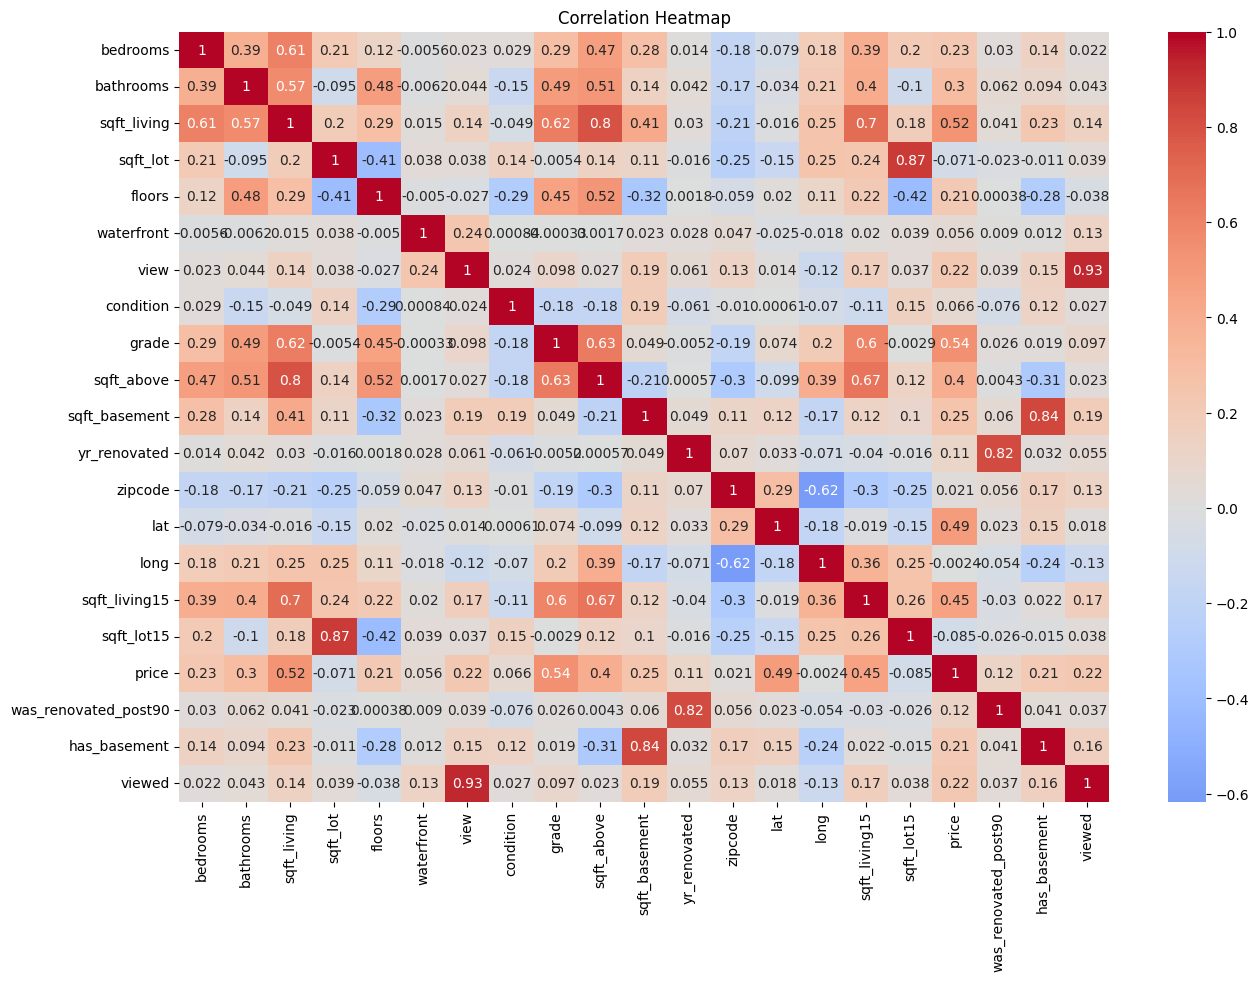

In [230]:
# Correlation matrix
corr = training_df.corr()

# Plot heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [232]:
def drop_corrfeats(df):
    '''Drop features which appear correlated'''
    df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1)
    return df

In [235]:
drop_corrfeats(training_df)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,price,was_renovated_post90,has_basement,viewed,coord
6181,2014-12-12,4,1,2090,7416,1.0,0,0,4,7,...,1950_to_1975,0,98031,47.4107,-122.179,289950.0,0,1,0,"(47.4107, -122.179)"
4688,2014-12-02,3,2,1450,5175,1.0,0,0,3,8,...,1975_to_1997,0,98133,47.7082,-122.338,465000.0,0,1,0,"(47.7082, -122.338)"
21200,2015-02-24,3,1,1370,1990,3.0,0,0,3,9,...,1997_to_2015,0,98102,47.6434,-122.324,720000.0,0,0,0,"(47.6434, -122.324)"
18874,2014-08-11,3,1,1330,7216,1.0,0,0,3,7,...,1950_to_1975,0,98034,47.7199,-122.180,381000.0,0,0,0,"(47.7199, -122.18)"
19388,2014-05-13,3,1,1270,5112,1.0,0,0,3,7,...,pre1950,0,98115,47.6760,-122.288,465000.0,0,0,0,"(47.676, -122.288)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2014-05-31,5,2,2080,13189,2.0,0,0,3,8,...,1975_to_1997,0,98074,47.6288,-122.031,538888.0,0,0,0,"(47.6288, -122.031)"
11964,2014-11-13,3,1,1000,6914,1.0,0,0,3,7,...,pre1950,0,98125,47.7144,-122.319,378000.0,0,0,0,"(47.7144, -122.319)"
21575,2014-11-11,3,2,3087,5002,2.0,0,0,3,8,...,1997_to_2015,0,98023,47.2974,-122.349,399950.0,0,0,0,"(47.2974, -122.349)"
5390,2014-09-30,3,2,2120,4780,2.0,0,0,3,7,...,1997_to_2015,0,98053,47.6810,-122.032,575000.0,0,0,0,"(47.681, -122.032)"


In [236]:
# Save a csv copy
training_df.to_csv('dfcleaned.csv')


In [238]:
training_df.shape

(14614, 24)

In [ ]:
# One-hot encoding
# Define one-hot encoding function
def one_hot_encode(df, catcols):
    '''Returns df with dummy vars and drops original column'''
    
    # Create DataFrame with above columns
    dfonehot = df[catcols].astype('category')
    
    # Get dummy variables and drop first one to not create dependency
    dfonehot = pd.get_dummies(dfonehot, drop_first = True)
    
    # Recreate DataFrame with one-hot encoded variables
    df = pd.concat([df,dfonehot], axis=1)
    
    # Drop columns where we have done one-hot encoding
    df = df.drop(catcols, axis = 1)
        
    return df

In [ ]:
# Apply function on df
df = one_hot_encode(df, 'yr_built')
df.head()